In [2]:
#1
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg = agg_clustering.fit_predict(X_imputed)


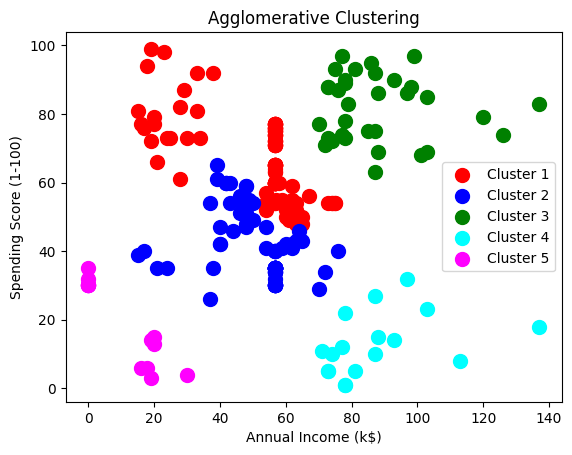

In [4]:
#Visualizing

plt.scatter(X_imputed[y_agg == 0, 0], X_imputed[y_agg == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_imputed[y_agg == 1, 0], X_imputed[y_agg == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_imputed[y_agg == 2, 0], X_imputed[y_agg == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_imputed[y_agg == 3, 0], X_imputed[y_agg == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_imputed[y_agg == 4, 0], X_imputed[y_agg == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

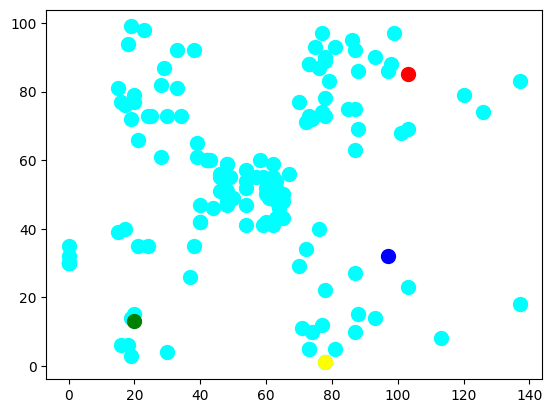

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('customer.csv')
X = df.iloc[:, [3, 4]].values


def agglomerative_clustering(X, n_clusters, linkage='single'):


    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            distance = np.linalg.norm(X[i] - X[j])
            distances[i,j] = distance
            distances[j,i] = distance


    clusters = [[i] for i in range(n_samples)]


    if linkage == 'single':
        linkage_fn = np.min
    elif linkage == 'complete':
        linkage_fn = np.max
    elif linkage == 'average':
        linkage_fn = np.mean


    while len(clusters) > n_clusters:

        cluster_distances = np.zeros((len(clusters), len(clusters)))
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distances_ij = []
                for k in range(len(clusters[i])):
                    for l in range(len(clusters[j])):
                        distances_ij.append(distances[clusters[i][k], clusters[j][l]])
                cluster_distances[i,j] = linkage_fn(distances_ij)
                cluster_distances[j,i] = cluster_distances[i,j]


        i, j = np.unravel_index(cluster_distances.argmin(), cluster_distances.shape)
        clusters[i].extend(clusters[j])
        del clusters[j]


    labels = np.zeros(n_samples, dtype=int)
    for i, cluster in enumerate(clusters):
        for j in cluster:
            labels[j] = i

    return labels

y_agg = agglomerative_clustering(X, n_clusters=5)


plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1], s = 100, c = 'cyan', label = 'Cluster 1')
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_agg == 3, 0], X[y_agg == 3, 1], s = 100, c = 'Yellow', label = 'Cluster 4')
plt.scatter(X[y_agg == 4, 0], X[y_agg == 4, 1], s = 100, c = 'blue', label = 'Cluster 5')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.60)

def dbscan(X, eps, min_samples):
    def region_query(p, eps):
        return [q for q in range(X.shape[0]) if np.linalg.norm(X[p] - X[q]) <= eps]

    def expand_cluster(p, neighbors, cluster_label):
        labels[p] = cluster_label
        i = 0
        while i < len(neighbors):
            q = neighbors[i]
            if labels[q] == 0:
                labels[q] = cluster_label
                q_neighbors = region_query(q, eps)
                if len(q_neighbors) >= min_samples:
                    neighbors.extend(q_neighbors)
            i += 1

    labels = np.zeros(X.shape[0], dtype=int)
    cluster_label = 0

    for p in range(X.shape[0]):
        if labels[p] == 0:
            neighbors = region_query(p, eps)
            if len(neighbors) < min_samples:
                labels[p] = -1
            else:
                cluster_label += 1
                expand_cluster(p, neighbors, cluster_label)

    return labels



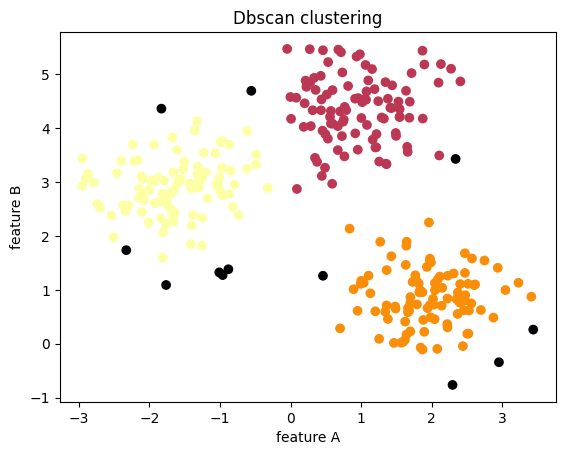

In [7]:

eps = 0.5
min_samples = 5


dbscan_labels = dbscan(X, eps, min_samples)


plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='inferno')

plt.title('Dbscan clustering')
plt.xlabel('feature A')
plt.ylabel('feature B')
plt.show()